In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import signal

<IPython.core.display.Javascript object>


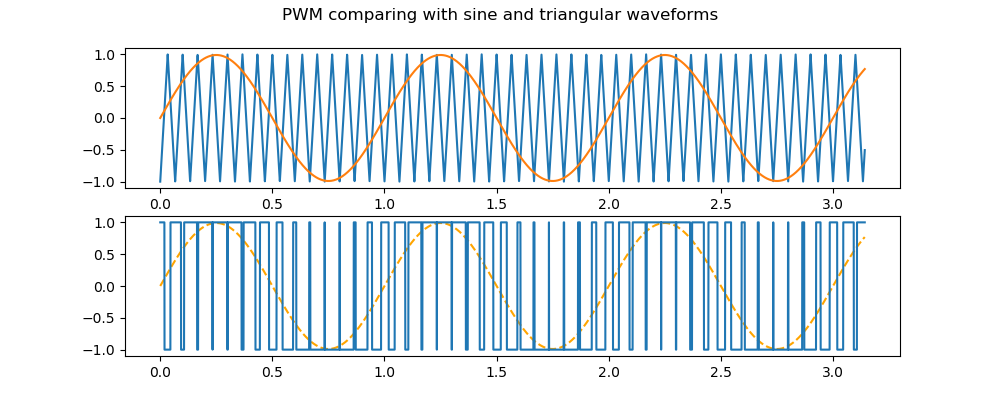

interactive(children=(FloatSlider(value=1.0, description='Frequency', max=5.0, step=0.01), FloatSlider(value=0…

In [9]:
x = np.linspace(0, np.pi, 10000)
triangle = signal.sawtooth(2 * np.pi * 15 * x, 0.5)

fig, (ax_ctrl, ax_pwm) = plt.subplots(2, 1, figsize=(10,4))
fig.suptitle('PWM comparing with sine and triangular waveforms')

ax_pwm.set_ylim([-1, 1])

def gen_pwm(amplitude, x, control, reference):
    y = control - reference
    y[y>=0] = amplitude
    y[y<0] = -amplitude
    return y
    
def update_sine(ax_ctrl, ax_pwm, ctrl_freq, ctrl_ampl):
    ax_ctrl.clear()
    ax_pwm.clear()
    
    y_ctrl = ctrl_ampl * np.sin(2 * np.pi * ctrl_freq * x)
    ax_ctrl.plot(x, triangle)
    ax_ctrl.plot(x, y_ctrl)
    
    pwm = gen_pwm(1, x, y_ctrl, triangle)
    ax_pwm.plot(x, y_ctrl, '--', color='orange')
    ax_pwm.plot(x, pwm)

sine_freq_w = widgets.FloatSlider(
    min=0.0, 
    max=5, 
    step=.01, 
    value=1, 
    description='Frequency', 
    continuous_update=True
)

sine_amp_w = widgets.FloatSlider(
    min=0.0, 
    max=.99, 
    step=.01, 
    value=.99, 
    description='Amplitude', 
    continuous_update=True, 
    orientation='vertical'
)

interact(update_sine, ax_ctrl=fixed(ax_ctrl), ax_pwm=fixed(ax_pwm), ctrl_freq=sine_freq_w, ctrl_ampl=sine_amp_w);